In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

### Importing data

We are first loading the train and test data.

In [3]:
train_file_path = 'lab2_train.csv'
test_file_path = 'lab2_test.csv'

train_data = pd.read_csv(train_file_path, delimiter=',')
test_data = pd.read_csv(test_file_path, delimiter=',')

### What properties of the data do you think are important for your pipeline design?

By visualizing the pairs of likes between users, we can see that users with higher IDs (potentially new users in the system) are not interacting a lot with users with lower IDs (older users in the system). This might mean the system did not recommend users registered earlier to new registered users, maybe due to the inactivity of older users.

The idea that higher IDs suggest more recent users in the system is also supported by the sparsity of the data towards higher IDs. The users joined recently, so they did not have many interactions with the other users in the system.

There is some weird behaviour happening for users with higher IDs, we can see an exponential curve, with somewhat noticeable density around this curve...

# TODO explain why it is important for the pipeline

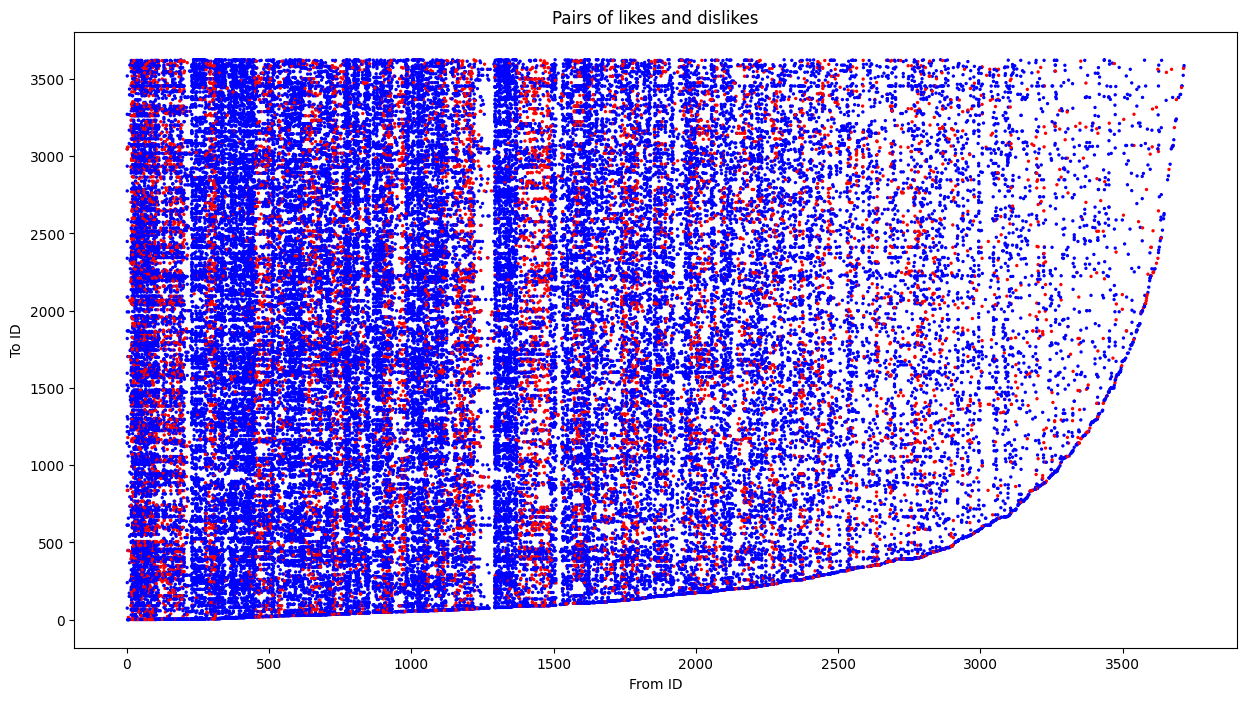

In [13]:
is_like = train_data['is_like'].to_numpy()

colors = ['red' if v else 'blue' for v in is_like]
# 'red' -> 'Like', 'blue' -> 'Dislike'

plt.figure(figsize=(15, 8))
plt.scatter(x=train_data['user_from_id'], y=train_data['user_to_id'], c=colors, s=2)
plt.xlabel('From ID')
plt.ylabel('To ID')
plt.title('Pairs of likes and dislikes')

plt.show()

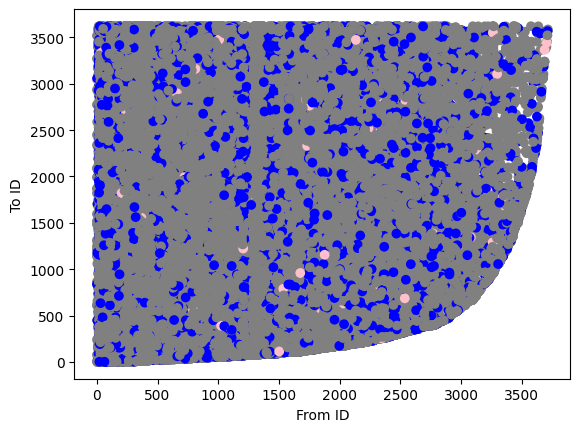

In [16]:
is_like = train_data['is_like'].to_numpy()
is_match = train_data['is_match'].to_numpy()

colors = []
for i in range(len(is_like)):
    if is_match[i] == 1:
        colors.append('pink')
    elif is_like[i] == 1:
        colors.append('blue')
    else:
        colors.append('gray')

plt.scatter(x=train_data['user_from_id'], y=train_data['user_to_id'], c=colors)

plt.xlabel('From ID')
plt.ylabel('To ID')

# Show the plot
plt.show()

In [17]:
train_data

,user_from_id,user_to_id,is_like,is_match
0,1136,3141,False,False
1,2424,3174,False,False
2,1300,3590,False,False
3,800,2736,False,False
4,883,437,False,False
...,...,...,...,...
76387,2376,3057,False,False
76388,1163,933,False,False
76389,2770,3324,False,False
76390,879,785,False,False


In [18]:
test_data

,user_from_id,user_to_id,is_like,is_match
0,2644,2595,?,?
1,567,2412,?,?
2,2732,3187,?,?
3,783,854,?,?
4,1104,2723,?,?
...,...,...,...,...
16198,2197,1449,?,?
16199,2507,316,?,?
16200,511,889,?,?
16201,2148,2947,?,?


### Non-negative matrix factorization

In [19]:
import numpy as np
import pandas as pd


def nmf(X: pd.DataFrame, n_components: int, max_iter: int=1000, tol: float=1e-3):
  """
  Decomposes the original sparse matrix X into two matrices W and H. 
  """
  # Initialize W and H with random non-negative values
  W = np.random.rand(X.shape[0], n_components)
  H = np.random.rand(n_components, X.shape[1])

  curr_iter = 0
  prev_error = np.linalg.norm(X - W @ H) ** 2
  
  # START ANSWER
  while curr_iter < max_iter:    
    top = ((W.T) @ X)
    bottom = ((W.T) @ W @ H)
    H = H * top / (bottom + 1e-9)

    top = (X @ (H.T))
    bottom = (W @ H @ (H.T))

    W = W * top / (bottom + 1e-9)
    
    reconstruction_error = np.linalg.norm(X - W @ H) ** 2
    
    if prev_error - reconstruction_error < tol:
      break
    
    curr_iter += 1
  # END ANSWER

  return W, H

### Minhashing

In [20]:
import numpy as np
import sys
from library import HashFunction


def compute_signature(hashes: list[HashFunction], ids: list[set[int]]):
    """
    This function will calculate the MinHash signature matrix from our sets of ids
    using the list of hash functions (hashes)
    :param hashes: The list of hash functions of arbitrary length
    :param ids: The list of sets of ids
    :return: The MinHash signature matrix for the given sets of ids
    """

    result = np.full((len(hashes), len(ids)), sys.maxsize)
    space = set().union(*ids)
    sorted_space = sorted(space)
    for ix,r in enumerate(sorted_space):
        for c in range(result.shape[1]):
            if r in ids[c]:
                for i, hf in enumerate(hashes):
                    result[i][c] = min(result[i][c], hf.hashf(ix, len(sorted_space)))

    return result

[]

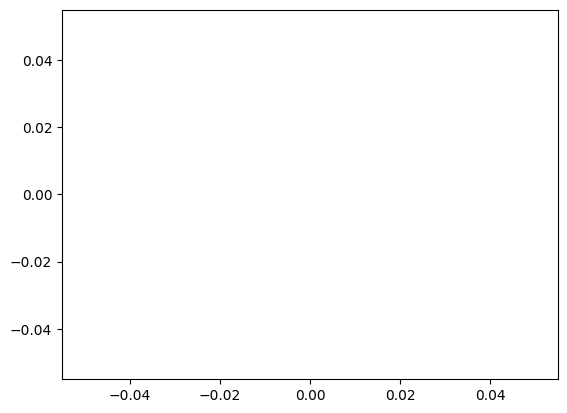

In [21]:

plt.plot()
